In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
# can only work for two types  . here we have petrol , diesel and CNG.

# df['Fuel'] = df['Fuel_Type'] == 'Diesel'
# df['Fuel'] = df['Fuel'].astype(int)
# df['Fuel']

In [7]:
df.replace({'Fuel_Type':{'Petrol' : 0 , 'Diesel' : 1 , 'CNG' : 2}},inplace=True)
df.replace({'Seller_Type':{'Dealer' : 0 , 'Individual' : 1 }},inplace=True)
df.replace({'Transmission':{'Manual' : 0 , 'Automatic' : 1}},inplace=True)

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(['Car_Name' , 'Selling_Price'] , axis = 1)
y = df['Selling_Price']

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)

In [14]:
from sklearn import metrics

In [15]:
# R^2 score

error_score = metrics.r2_score(y_train , y_pred_train)
print("error score is : ",error_score)

error score is :  0.8839793496750796


In [16]:
import matplotlib.pyplot as plt

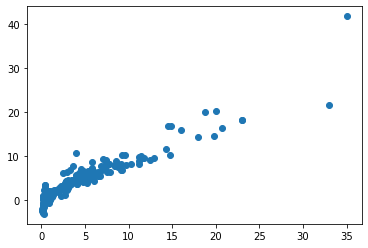

In [17]:
plt.scatter(y_train , y_pred_train)

In [18]:
y_pred_test = model.predict(X_test)

In [19]:
test_score = metrics.r2_score(y_test , y_pred_test)
test_score

0.8468053957653598

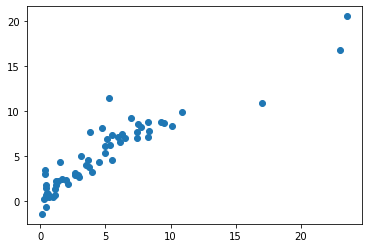

In [20]:
plt.scatter(y_test , y_pred_test)

In [21]:
from sklearn.linear_model import Lasso

In [22]:
model = Lasso()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)

In [23]:
from sklearn import metrics

In [24]:
# R^2 score

error_score = metrics.r2_score(y_train , y_pred_train)
print("error score is : ",error_score)

error score is :  0.8480302868137157


In [25]:
import matplotlib.pyplot as plt

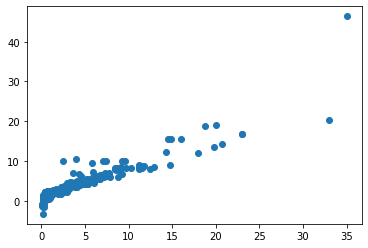

In [26]:
plt.scatter(y_train , y_pred_train)

In [27]:
y_pred_test = model.predict(X_test)

In [28]:
test_score = metrics.r2_score(y_test , y_pred_test)
test_score

0.7985512461284692

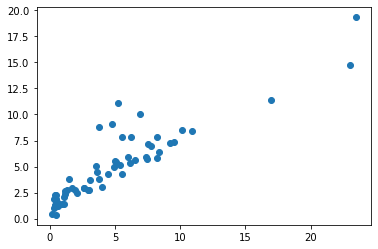

In [29]:
plt.scatter(y_test , y_pred_test)